In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

#define kets and bras
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])

In [2]:
#define outer products for operators
#The outer product is the ket and bra next to each other (Inner product is bra next to ket)
c00 = np.outer(ket_0, ket_0)
c01 = np.outer(ket_0, ket_1)
c10 = np.outer(ket_1, ket_0)
c11 = np.outer(ket_1, ket_1)

In [3]:
def discrete_qw(N, coin, shift, initial_spin):
    """Discrete time quantum walk with number of steps N, taking the coin operator C and the shift operator S. Returns a plot of the probabilities""" 
    
    #N is the number of time a step is made
    N = 5
    
    #P defines the dimensions of the space on which the walk takes place
    P = 2*N+1 
    c, d = coin
    right, left = shift(P)

    #Shift operation S
    S = np.kron(left, c00) + np.kron(right, c11)
    #Total combination of operations applied to the next iteration of position state
    #This operator calculates each iteration
    U = S.dot(np.kron(np.eye(P), c))

    #initialising position and coin states 
    #creating x axis position points
    posn_0 = np.zeros(P)
    #setting intial central position to one
    posn_0[N] = 1
    
    #Here we defines the intial coin operator that is used
    #Either ket_0 or ket_1 for the initial state of the coin
    #Particle is intially localised in either spin up or spin down state
    if initial_spin ==0:
        c_0 = ket_0
    if initial_spin == 1:
        c_0 = ket_1
    
    #Georgia's code: (1/np.sqrt(2))*(ket_0 + ket_1*1j) 
    psi_0 = np.kron(posn_0, c_0)
    #evolution after N steps
    #Applies U operator N times to intial state
    psi_N = np.linalg.matrix_power(U, N).dot(psi_0)

    #make measurement 
    probs = np.empty(P)
    prob_sum = 0
    for i in range(P):
        posn = np.zeros(P)
        posn[i] = 1
        
        #Operator to find the factor in front of each term relating the probability
        M_i = np.kron(np.outer(posn, posn), np.eye(2))
        m = M_i.dot(psi_N)
        #Taking inner product to find probabilities
        probs[i] = m.dot(m.conjugate()).real
        prob_sum+=probs[i]
    
    #Worth noting that the probabilities may not always sum to one due to rounding within python
    print("Sum of the probabilities is", prob_sum)
        

    #plot probability distribution
    f1 = plt.figure()
    plt.plot(np.arange(-N,N+1), probs)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    t = 'Discrete time Quantum Walk for %d steps - ' % N
    plt.title(t + d)
    f1.show

In [4]:
def hadamard_coin(c00, c01, c10, c11): 
    d = 'Hadamard Coin'
    return (1/np.sqrt(2))*(c00 + c01 + c10 - c11), d


In [5]:
def shift_operator(P):
    #axis=0 defines the row axes, so that shifts take place along the rows.
    #np.roll shifts positons of each element by a given amount
    #np.eye sets up PxP matrix with ones across diagonal 
    r = np.roll(np.eye(P), 1, axis=0)
    l = np.roll(np.eye(P), -1, axis=0)
    return r,l

In [6]:
def rotation_coin(theta):
    a00 = math.cos(theta)
    a01 = -1j*math.sin(theta)
    a10 = -1j*math.sin(theta)
    a11 = math.cos(theta)
    d = 'Rotation Coin, theta = ' + str(theta) 
    return [[a00, a01],[a10, a11]], d


In [7]:
def identity_coin():
    d = 'Identity Coin'
    return np.eye(2), d 

def ant_identity_coin():
    d = 'Anti-Identity Coin'
    return [[0,1],[1,0]], d

Sum of the probabilities is 0.9999999999999991


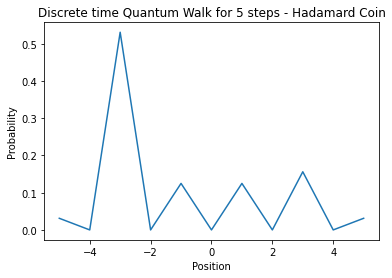

In [8]:
discrete_qw(100, hadamard_coin(c00,c01,c10,c11), shift_operator, 0)


Sum of the probabilities is 1.0


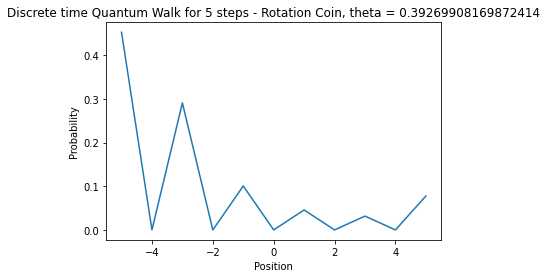

In [9]:
discrete_qw(100, rotation_coin((1/8)*np.pi), shift_operator, 0)